Support Vector Machines
=========================

## SVM with linear decision boundary

*This example uses as support vector machine to create a linear decision boundary to separate two classes*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots. Scipy and Scikit-Learn are also used for training 

In [27]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
from sklearn import svm 

### Load Data

In [28]:
mat = sio.loadmat("../data/ex6data1")
X, y = mat['X'], mat['y'] 

#  X: (51,2)
#  y: (51,1)

### Training

In [29]:
# Organise data into classes
#c1,c2 = np.where(y==1),np.where(y==0)
c1,c2 = (y == 1).ravel(),(y == 0).ravel()

# Train the SVM using the C-Support Vector Classification
'''
    The C parameter is a positive value that controls the penalty for the misclassified
    trainng examples. A large value intructs the SVM to classify all data points correctly.
'''
Csup = 1.0 # ~30 will produce a boundary with all points classified correctly
clf = svm.SVC(C=Csup, kernel='linear')
clf.fit( X, y.flatten() ) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Decision Boundary

In [30]:
def decision_boundary(svc, X,samples=100):
    '''
        svc is scikit-learn SVM class using C-Support Vector Classification
    '''
    x1 = np.linspace(np.min(X[:,0])-0.25,np.max(X[:,0])+0.25,samples)
    x2 = np.linspace(np.min(X[:,1])-0.25,np.max(X[:,1])+0.25,samples)

    z = np.zeros((samples,samples))
    for j in xrange(samples):
        for i in xrange(samples):
            z[j][i] = float(svc.predict([[x1[j],x2[i]]]))

    return x1,x2,z.transpose()

In [31]:
x1points,x2points,z = decision_boundary(clf, X)

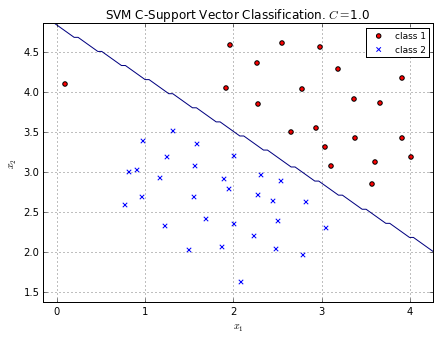

In [32]:
# Plot data with decision boundary
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(X[c1,0], X[c1,1], marker='o',c='r',label='class 1')
plt.scatter(X[c2,0], X[c2,1], marker='x',c='b',label='class 2')
plt.contour(x1points, x2points, z, levels=[0], linewidth=2)
plt.xlim([min(X[:,0]-0.25),max(X[:,0])+0.25])
plt.ylim([min(X[:,1]-0.25),max(X[:,1])+0.25])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("SVM C-Support Vector Classification. $C=$" + str(Csup) )
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.grid(True)
plt.show()